# Aufgabe 16: Daten visualisieren

Es ist äusserst Zentral, Daten regelmässig und oft zu visualisieren. Die *de facto* standart Library hierfür in Python ist `matplotlib`. Diese Library kann man direkt ansteuern wie in [diesem Tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html) beschrieben wird. Wir verwenden die library jedoch etwas anders: Dabei nutzen wir die Tatsache aus, dass sowohl `pandas` wie auch `geopandas` eingebaute Methoden (*methods*) haben um deren Inhalte zu visualisieren. Die Methode heisst in beiden Fällen `.plot()`, wie wir weiter unten noch sehen werden.


## Histogramm aus `List`

`pandas` vereinfacht das Visualisieren von Daten sogar soweit, dass es sich jewils lohnt seine Listen, Dictionaries usw. zuerst in eine `Series` oder `DataFrame` zu überführen um sie zu visualisieren (wie ich zum Beispiel in {ref}`chap-random-numbers` jeweils gemacht habe). 

<AxesSubplot:ylabel='Frequency'>

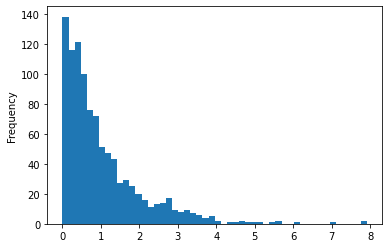

In [24]:
import random

random_gamma = [random.gammavariate(1, 1) for x in range(1000)]

random_gamma = pd.Series(random_gamma)

random_gamma.plot(kind = "hist", bins = 50)

Weitere Beispiele zu Histogrammen aus Listen findet ihr im Kapitel {ref}`chap-random-numbers` .

## Boxplot aus `List`

Das Visualisieren als Boxplot ist sehr ähnlich, man ersetzt `"hist"` lediglich durch `"box`. Eine komplette liste der möglichen Argumente für findet ihr hier: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html

<AxesSubplot:>

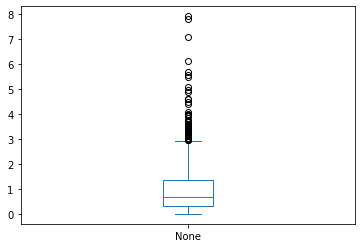

In [28]:
random_gamma.plot(kind = "box")

## Scatterplot aus DataFrame

Um einen Scatterplot zu erstellen, braucht es eine `DataFrame` (eine `Series` reicht hierfür nicht aus).

In [30]:
zeckenstiche = pd.read_csv("data/zeckenstiche.csv")

<AxesSubplot:xlabel='x', ylabel='y'>

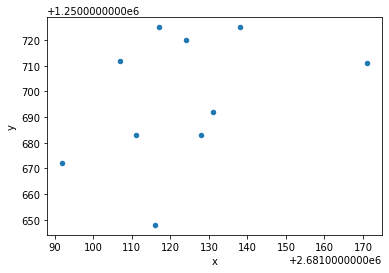

In [37]:
zeckenstiche.plot("x", "y", kind = "scatter")

## Karte aus GeoDataFrame

Um aus *GeoDataFrames* Karten zu machen verwendet man ebenfalls die `.plot()` Methode. Um wirklich schöne Karten mit Python herzustellen braucht man viel Übung. Für eine schnelle Visualisierung reicht aber die `.plot()` Methode.


In [ ]:
import geopandas as gpd

zeckenstiche = gpd.read_file("data/zeckenstiche.gpkg")
wald = gpd.read_file("data/wald.gpkg")

**Einfache Plots ohne anpassung:**

<AxesSubplot:>

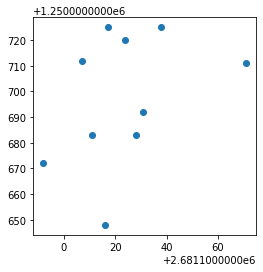

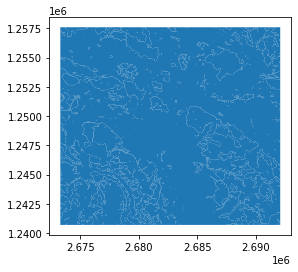

In [58]:
wald.plot()

**Anpassung der Plot Grösse:**

<AxesSubplot:>

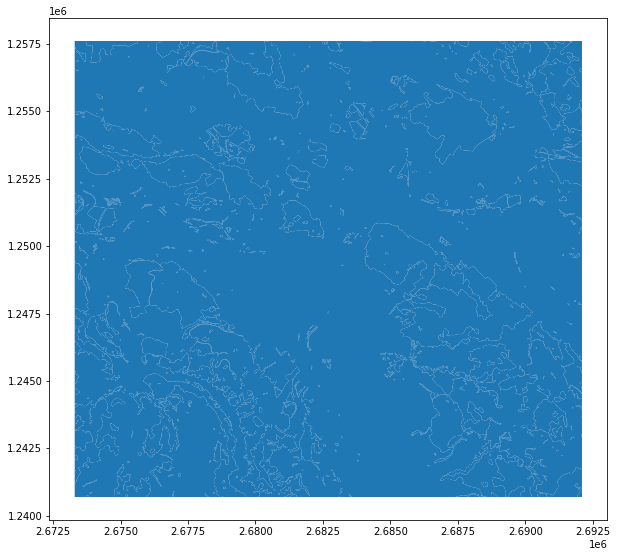

In [67]:
wald.plot(figsize = (10,10))

**Choroplethenkarte Karte**

<AxesSubplot:>

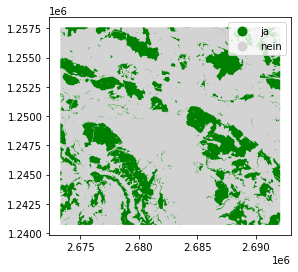

In [68]:
from matplotlib.colors import ListedColormap

wald.plot(column = "Wald_text", legend = True, cmap = ListedColormap(["green","lightgrey"]))

**Mehrere Layers:**

<AxesSubplot:>

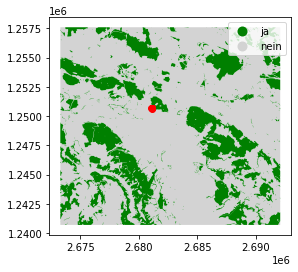

In [70]:
base = wald.plot(column = "Wald_text", legend = True, cmap = ListedColormap(["green","lightgrey"]))
zeckenstiche.plot(color = "Red", ax = base)